Girish

# CS 229, Fall 2017
## Solutions to Problem Set #1: Supervised Learning

## TOC

* [1 Logistic regression](#1-Logistic-regression)
* [2 Poisson regression and the exponential family](#2-Poisson-regression-and-the-exponential-family)
* [3 Gaussian discriminant analysis](#3-Gaussian-discriminant-analysis)
* [4 Linear invariance of optimization algorithms](#4-Linear-invariance-of-optimization-algorithms)
* [5 Regression for denoising quasar spectra](#5-Regression-for-denoising-quasar-spectra)

---



## 1 Logistic regression


### (a)

Say m = 1, the (i,j) term of the Hessian:

\begin{equation*}
\begin{aligned}
\frac{\partial J(\theta)}{\partial \theta_i} &= -y x_i \frac{1}{1 + e^{y \theta^T x}} \\
\\
H_{ij} &= \frac{\partial^2 J(\theta)}{\partial \theta_i \partial \theta_j} \\
&= y^2 x_i x_j \frac{e^{y \theta^T x}}{(1 + e^{y \theta^T x})^2} \\
&= x_i x_j \bigg( y^2 \frac{e^{y \theta^T x}}{(1 + e^{y \theta^T x})^2}  \bigg) \\
&= x_i x_j \bigg( something +^{ve} \bigg)
\end{aligned}
\end{equation*}


For m > 1,

\begin{equation*}
\begin{aligned}
\frac{\partial J(\theta)}{\partial \theta_i} &= \frac{-1}{m} \displaystyle\sum_{k=1}^{m} y^{(k)} x_i^{(k)} \frac{1}{1 + e^{y^{(k)} \theta^T x^{(k)}}} \\
\\
H_{ij} &= \frac{\partial^2 J(\theta)}{\partial \theta_i \partial \theta_j} \\
&=  \frac{1}{m} \displaystyle\sum_{k=1}^{m} \frac{ x_i^{(k)} x_j^{(k)} y^{{(k)}^2} e^{y^{(k)} \theta^T x^{(k)}}}{(1 + e^{y^{(k)} \theta^T x^{(k)}})^2} \\
\end{aligned}
\end{equation*}

Calculate $z^THz$ for m = 1

\begin{equation*}
\begin{aligned}
z^THz &= \displaystyle\sum_{i=1}^{n} \displaystyle\sum_{j=1}^{n} H_{ij} z_i z_j \\
&= (something +^{ve}) \displaystyle\sum_{i=1}^{n} \displaystyle\sum_{j=1}^{n} x_i x_j z_i z_j  \\
&= (something +^{ve}) \displaystyle\sum_{i=1}^{n} (x_i z_i) (x_0 z_0 + x_1 z_1 + ... x_n z_n)  \\
&= (something +^{ve}) \big( (x_0 z_0 + x_1 z_1 + ... x_n z_n) (x_0 z_0 + x_1 z_1 + ... x_n z_n) \big) \\
&= (something +^{ve}) {(x_0 z_0 + x_1 z_1 + ... x_n z_n)}^2 \\
&= (something +^{ve}) {(x^T z)}^2 \\
&>= 0
\end{aligned}
\end{equation*}

It is trivial to extend this for m > 1 as the above $x$'s needs to be summed for m examples. Since the term for each example is $>= 0$, the overall sum will also be $>= 0$.

---
### (b)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import pprint as pp
import functools
import operator

In [2]:
with open('data/logistic_x.txt') as csvfile:
    xreader = csv.reader(csvfile, delimiter = ' ')
    Xt = []
    for row in xreader:
        Xt.append([1] + [float(i) for i in row if i])

X = np.array(Xt)
#X[:10], X.shape

In [3]:
with open('data/logistic_y.txt') as csvfile:
    yreader = csv.reader(csvfile, delimiter = ' ')
    Y = []
    for row in yreader:
        Y.append(float(row[3]))
#Y[:10], len(Y)

In [4]:
def gradient(theta):
    grad_i = [-y * x / (1 + math.exp((x @ theta) * y)) for x, y in zip(X, Y)]
    grad = functools.reduce(operator.add, grad_i) / len(Y)
    return(grad)

In [5]:
def hessian_ij(theta, i, j):
    return(sum([x[i] * x[j] * y**2 * math.exp((x @ theta) * y) / (1 + math.exp((x @ theta) * y))**2 
                for x, y in zip(X, Y)]) / len(Y))


In [6]:
# Iteration step
def improve(theta):
    grad = gradient(theta)
    # Hessian
    H = np.reshape([hessian_ij(theta, i, j) for i in range(3) 
                    for j in range(3)], (3, 3))
    H_inv = np.linalg.inv(H)
    return(theta - (H_inv @ grad))

In [7]:
def estimate_theta():
    theta = np.array([0, 0, 0])
    while True:
        newTheta = improve(theta)
        epsilon = np.ones(X.shape[1]) * 0.000001
        if all(np.absolute(newTheta - np.absolute(theta) < epsilon)):
            return(newTheta)
        theta = newTheta
        #print(theta)

In [8]:
estimated_theta = estimate_theta()
estimated_theta

array([-2.6205116 ,  0.76037154,  1.17194674])

---
### (c)

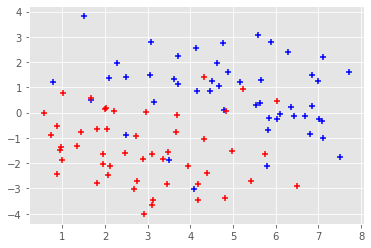

In [9]:
# Plot the data set
p = [(x[1], x[2]) for x, y in zip(X, Y) if y == 1]
n = [(x[1], x[2]) for x, y in zip(X, Y) if y == -1]
plt.style.use('ggplot')
plt.scatter(*zip(*p), c='b', marker='+')
plt.scatter(*zip(*n), c='r', marker='+');

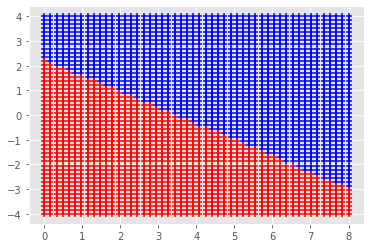

In [10]:
# Decision boundary

def hypothesis(x):
    return(1 / (1 + math.exp(-estimated_theta @ x)))

points = [(x1, x2) for x1 in np.linspace(0, 8, 50)
                for x2 in np.linspace(-4, 4, 50)]

plt.scatter(*zip(*[(x[0], x[1]) for x in points if hypothesis(np.array([1, *x])) >= 0.5]), c='b', marker='+')
plt.scatter(*zip(*[(x[0], x[1]) for x in points if hypothesis(np.array([1, *x])) < 0.5]), c='r', marker='+');

---
---

## 2 Poisson regression and the exponential family

### (a)

\begin{equation*}
\begin{aligned}
P(y; \lambda) &= \frac{e^{-\lambda} \lambda^y}{y!} \\
&= \frac{1}{y!} \exp(-\lambda) \exp(log(\lambda^y) \\
&= \frac{1}{y!} \exp(ylog(\lambda) - \lambda) \\
\end{aligned}
\end{equation*}

Where

\begin{align}
b(y) &= \frac{1}{y!} \\
\eta &= log(\lambda) => \lambda = e^\eta \\
T(y) &= y \\
a(η) &= \lambda = e^\eta \\
\end{align}

### (b)

Canonical response function:

\begin{align}
g(\eta) &= \frac{\partial a(\eta)}{\partial \eta} \\
&= \frac{\partial e^\eta}{\partial \eta} \\
&= e^\eta = \lambda
\end{align}

### (c)

We make the assumption that $\eta = \theta^Tx$.     
Also, $\lambda = e^\eta$.     
Taking log on PDF and plugging the values:

\begin{equation*}
\begin{aligned}
P(y; \lambda) &= \frac{e^{-\lambda} \lambda^y}{y!} \\
log(P(y; \lambda)) &=  -\lambda + ylog(\lambda) - log(y!) \\
But, \lambda &= e^\eta = \exp(\theta^Tx) \\
l(\theta) = log(P(y | x; \theta)) &= -exp(\theta^Tx) + y\theta^Tx - log(y!)
\end{aligned}
\end{equation*}

Taking derivative w.r.t. $\theta_j$:

\begin{equation*}
\begin{aligned}
\frac{\partial l(\theta)}{\partial \theta_j} &= -exp(\theta^Tx) x_j + y x_j \\
&= -(exp(\theta^Tx) - y) x_j \\
\end{aligned}
\end{equation*}

We also assume that hypothesis function is nothing but the expected value (mean) of the distribution at a given X.

$h_\theta(x) = E[y|x;\theta] = \lambda = e^\eta = exp(\theta^Tx)$

So:

\begin{equation*}
\begin{aligned}
\frac{\partial l(\theta)}{\partial \theta_j}
&= -(h_\theta(x) - y) x_j \\
\end{aligned}
\end{equation*}

Stochastic Gradient Assent Rule:

\begin{equation*}
\begin{aligned}
\theta_j &:= \theta_j + \alpha(\frac{\partial l(\theta)}{\partial \theta_j}) \\
&:= \theta_j -(h_\theta(x) - y) x_j \\
\end{aligned}
\end{equation*}

### (d)

\begin{equation*}
\begin{aligned}
P(y; \eta) &= b(y) \exp \big(\eta^T T(y) - a(\eta) \big) \\
h(x) &= \frac{\partial a(\eta)}{\partial \eta} =  \frac{\partial a(\theta^Tx)}{\partial (\theta^Tx)} \\
T(y) &= y\\
log(P(y; \eta)) &= b(y) (\eta^T y - a(\eta)) \\
l(\theta) = log(y|x;\theta) &= b(y) \bigg(y \theta^Tx - a(\theta^Tx)\bigg) \\
\frac{\partial l(\theta_j)}{\partial \theta} &= b(y) \bigg(y x_j - x_j \frac{\partial a(\theta^Tx)}{\partial \theta_j} \bigg) \\
&= b(y) \bigg(y x_j - x_j \frac{\partial a(\theta^Tx)}{\partial (\theta^Tx)} \frac{\partial (\theta^Tx)}{\partial \theta_j} \bigg) \\
&= b(y) x_j(y - h(x))
\end{aligned}
\end{equation*}

---
---

## 3 Gaussian discriminant analysis

### (a)

Consider the case of y = 1.   
(Parameters are dropped for convenience. $P(y|x; \phi,Σ,μ_{−1},μ_1) = P(y|x;...)$    

\begin{equation*}\begin{aligned}
P(y=1 | x;...) &= \frac{P(x|y=1) P(y=1)}{P(x)}  \\
&= \frac{P(x|y=1) P(y=1)}{P(x, y=1) + P(x, y=-1)} \\ 
&= \frac{P(x|y=1) P(y=1)}{P(x|y=1)P(y=1) + P(x|y=-1)P(y=-1)} \\ 
&= \frac{1}{1 + \frac{P(x|y=-1)P(y=-1)} {P(x|y=1) P(y=1)}}\\
\\
\frac{P(x|y=-1)P(y=-1)} {P(x|y=1) P(y=1)} &= exp\bigg(-\frac{1}{2} \big((x - \mu_{-1})^T \Sigma^{-1} (x-\mu_{-1}) - (x - \mu_{1})^T \Sigma^{-1} (x-\mu_{1})\big)\bigg) \big(\frac{1-\phi}{\phi} \big) \\
&= \exp\big(log(\frac{1-\phi}{\phi}) \big) \exp\bigg( -\frac{1}{2} \displaystyle\sum_{i=1}^{n}\displaystyle\sum_{j=1}^{n} \big(
(x_i-\mu_{-1})C_{ij} (x_j-\mu_{-1}) - (x_i-\mu_{1})C_{ij} (x_j-\mu_{1})  \big) \bigg) \\
&= \exp\bigg( -\frac{1}{2} \displaystyle\sum_{i=1}^{n}\displaystyle\sum_{j=1}^{n} \big(
(x_i-\mu_{-1})C_{ij} (x_j-\mu_{-1}) - (x_i-\mu_{1})C_{ij} (x_j-\mu_{1})  \big) + log(\frac{1-\phi}{\phi})  \bigg) \\
&= \exp\Bigg( -\frac{1}{2} \bigg( (\mu_{1}-\mu_{-1}) \big( \displaystyle\sum_{i=1}^{n}\displaystyle\sum_{j=1}^{n}
(x_i C_{ij}) + \displaystyle\sum_{i=1}^{n}\displaystyle\sum_{j=1}^{n} (x_j C_{ij}) - (\mu_1^2 - \mu_{-1}^2) \displaystyle\sum_{i=1}^{n}\displaystyle\sum_{j=1}^{n} C_{ij}
\bigg) + log(\frac{1-\phi}{\phi}) \Bigg) \\
\\
\end{aligned}\end{equation*}


Notice that $C_{ij} = C_{ji}$ since Covariance matrix is symmetric. 

   
$\displaystyle\sum_{i=1}^{n}\displaystyle\sum_{j=1}^{n}
(x_j C_{ij}) = \displaystyle\sum_{j=1}^{n} \big(x_j \displaystyle\sum_{i=1}^{n} C_{ij}\big) = 
\displaystyle\sum_{i=1}^{n} \big(x_i \displaystyle\sum_{i=j}^{n} C_{ij}\big) $


$\displaystyle\sum_{i=1}^{n} C_{ij}$ is a vector, and we can derive $\theta$ (see below). All other terms evaluate to a constant, and they can be treated together as $\theta_0$



\begin{equation*}
\begin{aligned}
%x &= (\mu_{1}-\mu_{-1}) \displaystyle\sum_{i=1}^{n} \big(x_i \displaystyle\sum_{i=j}^{n} C_{ij}\big) \\
% \theta_0 &=  x\\
\end{aligned}
\end{equation*}

\begin{equation*}\begin{aligned}
\theta^Tx &= (\mu_{1}-\mu_{-1}) \displaystyle\sum_{i=1}^{n}x_i \big(\displaystyle\sum_{j=1}^{n}C_{ij} \big) \\
\theta_0 &= - \bigg(\big(\frac{1}{2} (\mu_1^2 - \mu_{-1}^2)\displaystyle\sum_{i=1}^{n}\displaystyle\sum_{j=1}^{n} C_{ij}\big) + log(\frac{1-\phi}{\phi}) \bigg) \\
\end{aligned}\end{equation*}

For y = -1, we need to interchange $\mu_{-1}$ by $\mu_1$ and $\phi$ by $(1-\phi)$, in the equations above. This leads to the logistic function  we are looking for.

---


### (b) and (c)

Bernoulli distribution $P(y; \phi)$ can be expressed as:

\begin{equation*}\begin{aligned}
P(y; \phi) &= \phi^{\frac{1}{2}(1+y)} (1-\phi)^{\frac{1}{2}(1-y)},  \forall y \in \left\{-1, 1\right\} \\
\end{aligned}\end{equation*}

The only term that contains $\phi$ in the log likelihood equations is:

\begin{equation*}\begin{aligned}
\ell(\phi) &= ... + \displaystyle\sum_{i=1}^{m} log(P(y^{(i)}; \phi)) \\
&= ... + \displaystyle\sum_{i=1}^{m} log\big( \phi^{\frac{1}{2}(1+y^{(i)})} (1-\phi)^{\frac{1}{2}(1-y^{(i)})}  \big) \\
&= ... + \displaystyle\sum_{i=1}^{m} \frac{1}{2}(1+y^{(i)}) log( \phi) + \frac{1}{2}(1-y^{(i)}) log(1-\phi) )
\end{aligned}\end{equation*}


Taking derivative w.r.t. $\phi$ and setting it to 0:

\begin{equation*}\begin{aligned}
\displaystyle\sum_{i=1}^{m} (1+y^{(i)})\frac{1}{\phi} + (1-y^{(i)})\frac{-1}{1-\phi} &= 0 \\
\displaystyle\sum_{i=1}^{m} (1+y^{(i)}) -2\phi &= 0 \\
\displaystyle\sum_{i=1}^{m} 2 \left\{y^{(i)}=1 \right\} -2\phi \displaystyle\sum_{i=1}^{n} 1 &= 0\\
2 \displaystyle\sum_{i=1}^{m} 1\left\{y^{(i)}=1 \right\} -2\phi m &= 0\\
\phi = \frac{1}{m} \displaystyle\sum_{i=1}^{m} 1 \left\{y^{(i)}=1 \right\} 
\end{aligned}\end{equation*}

The term in $\ell()$ that contains $\mu_1$ is:

\begin{equation*}\begin{aligned}
\ell(\mu_1, ...) &= \displaystyle\sum_{i=1}^{m} log(P(x^{(i)}|y{(i)}=1; ...)) + (...)\\
&= \displaystyle\sum_{i=1}^{m} log(\frac{1}{{2\pi}^{n/2}|\Sigma|^{1/2}})-\frac{1}{2} \big((x^{(i)} - \mu_{1})^T \Sigma^{-1} (x^{(i)}-\mu_{1}) + (...) \\
\end{aligned}\end{equation*}

Taking gradient w.r.t. $\mu_1$ and setting it to 0:

\begin{equation*}\begin{aligned}
0 &= \displaystyle\sum_{i=1}^{m} log(P(x^{(i)}|y{(i)}=1; ...)) \\
&= \displaystyle\sum_{i=1}^{m} log(\frac{1}{{2\pi}^{n/2}|\Sigma|^{1/2}})-\frac{1}{2} \big((x^{(i)} - \mu_{1})^T \Sigma^{-1} (x^{(i)}-\mu_{1})  \\
&= \displaystyle\sum_{i=1}^{m} 0 - \frac{1}{2}  (\Sigma^{-1} + \Sigma^{-T}) (x^{(i)} -\mu_1)(-1) \\
&= \displaystyle\sum_{i=1}^{m} \Sigma^{-1} (x^{(i)} -\mu_1) \\
&= \displaystyle\sum_{i=1}^{m} (x^{(i)} -\mu_1) \\
&=  \displaystyle\sum_{i=1}^{m} 1 \left\{y^{(i)}=1 \right\} x^{(i)} - \mu_1 \displaystyle\sum_{i=1}^{m} 1 \left\{y^{(i)}=1 \right\}  \\
\\
\\
\mu_1 &= \frac{\displaystyle\sum_{i=1}^{m} 1 \left\{y^{(i)}=1 \right\} x^{(i)} } {\displaystyle\sum_{i=1}^{m} 1 \left\{y^{(i)}=1 \right\}  } 
\end{aligned}\end{equation*}

$\mu_{-1}$ can be derived similarly.


The term in $\ell()$ relevent for $\Sigma$ is:

\begin{equation*}\begin{aligned}
\ell(\Sigma, ...) &= \displaystyle\sum_{i=1}^{m} log(P(x^{(i)}|y{(i)}; ...)) + (...) \\
&= \displaystyle\sum_{i=1}^{m} log(\frac{1}{{2\pi}^{n/2}}) -\frac{1}{2} log(|\Sigma|)  -\frac{1}{2} \big((x^{(i)} - \mu_{y^{(i)}})^T \Sigma^{-1} (x^{(i)}-\mu_{y^{(i)}}) +  (...) \\
\end{aligned}\end{equation*}


Taking derivative w.r.t. $pq^{th}$ term covariance matrix:

\begin{equation*}\begin{aligned}
\frac{\partial \ell(...)}{\partial \Sigma_{pq}} &= 
\displaystyle\sum_{i=1}^{m} \bigg( 0 -\frac{1}{2} \frac{1}{|\Sigma|} \frac{\partial |\Sigma|}{\partial \Sigma_{pq}}  -\frac{1}{2}
\frac{\partial}{\partial \Sigma_{pq}} \sum_{p}^{} \sum_{q}^{} (x^{(i)}_{pq} - \mu_{y^{(i)}})\Sigma_{pq} (x^{(i)}_{pq}-\mu_{y^{(i)}}) \bigg)\\
&=\displaystyle\sum_{i=1}^{m}  -\frac{1}{|\Sigma|} Adj(\Sigma)_{ji} - (x^{(i)}_{pq}-\mu_{y^{(i)}}) \\
\end{aligned}\end{equation*}

Extending the derivative to gradient of covariance matrix and setting it to 0:

\begin{equation*}\begin{aligned}
\displaystyle\sum_{i=1}^{m} -\Sigma^{T^{-1}} - (x^{(i)}-\mu_{y^{(i)}}) (x^{(i)}-\mu_{y^{(i)}})^T = 0 \\
-\Sigma^{-1} \displaystyle\sum_{i=1}^{m} (1)  - \displaystyle\sum_{i=1}^{m} (x^{(i)}-\mu_{y^{(i)}}) (x^{(i)}-\mu_{y^{(i)}})^T = 0 \\
\end{aligned}\end{equation*}

Note: $\Sigma^T = \Sigma$

Solving for $\Sigma$,

\begin{equation*}\begin{aligned}
\Sigma =  \frac{1}{m}\displaystyle\sum_{i=1}^{m} (x^{(i)}-\mu_{y^{(i)}}) (x^{(i)}-\mu_{y^{(i)}})^T  \\
\end{aligned}\end{equation*}


----
----

## 4 Linear invariance of optimization algorithms

### (a)


Newton's Formula:

$x^{(i+1)} := x^{(i)} − H^{−1}_{f(x^{(i)})} \nabla_{x^{(i)}} f(x^{(i)})$

Let's prove some identities by applying chain rule to the gradient and Hessian.

Multivariable Chain Rule:

$D(f \circ h)(z) = Df(h(z)) Dh(z)$,    
using the notation $D(f(x)) = Df(x)$.

Derivate vector of $f(h(z))$ (a scalar) is noting but the gradient of $f(h(z))$ w.r.t. z, transposed. We treat D vector as a row vector, and gradient as a column vector. $Df(x) = \nabla^T f(x)$.

Calculate $Dh(z)$:

\begin{equation}\begin{aligned}
\mathbf{z} &= A^{-1}\mathbf{x} \\
\mathbf{x} &= h(\mathbf{z}) = A\mathbf{z} \\
\end{aligned}\end{equation}

$h(\mathbf{z})$ is a vector where each element is given by $h_k = \sum_i a_{ki}z_i$.


$Dh(\mathbf{z}) \in \mathbb{R}^{nxn}$, where each row is formed by taking partial derivative of $h_k$ w.r.t. $z_1, z_2,z_3,$ etc.

\begin{equation}\begin{aligned}
Dh(\mathbf{z})_{kl} &= \frac{\partial h_k}{\partial z_l} \\
&= \frac{\partial}{\partial z_l} \sum_i a_{ki}z_i \\
&= a_{kl}
\end{aligned}\end{equation}

This means $Dh(\mathbf{z}) = A$.

Also, $(f \circ h )(z) = f(h(z)) = f(Az) = g(z)$.

Substituting above values,

\begin{equation}\begin{aligned}
D(f \circ h)(z) 
&= Df(h(z)) Dh(z) \\
&= Df(x) Dh(z) \\ 
&= Df(x) A \\
\\
\nabla_{z} g(z) &= A^T \nabla_{x} f(x) \\
\end{aligned}\end{equation}


We can apply chain rule to Hessian. Each row of Hessian of $f(x)$ is formed by taking partial derivative w.r.t. $x_1, x_2, etc.$ on $k^{th}$ element of gradient vector of $f(x)$.

\begin{equation}\begin{aligned}
D(D(f \circ h)(\mathbf{z})) 
&= D(Df(h(\mathbf{z})) Dh(\mathbf{z})) \\
&= D(Df(\mathbf{x}) A) \\
\end{aligned}\end{equation}

Say, $n(\mathbf{x}) = Df(\mathbf{x}) A$

$k_{th} $element of $n(\mathbf{x})$ is given by:
$(n(\mathbf{x}))_k = \sum_i \frac{\partial f}{\partial x_{i}}a_{ik}$



Applying chain rule:

\begin{equation}\begin{aligned}
D(n \circ h)(z) 
&= Dn(h(z)) Dh(z) \\
&= Dn(x) A \\ 
\end{aligned}\end{equation}


Calculate $Dn(x)$:

\begin{equation}\begin{aligned}
(Dn(x))_{kl} &= \frac{\partial n_k}{\partial x_l}\\ 
&=  \frac{\partial}{\partial x_l} \sum_i \frac{\partial f}{\partial x_i} a_{ik}
\end{aligned}\end{equation}


Substituting $Dn(x)$ in the equation for chain rule:

\begin{equation}\begin{aligned}
D(n \circ h)(z) 
&= Dn(x) A \\ 
(D(n \circ h)(z))_{mn} &= \sum_j \big( \frac{\partial}{\partial x_j} \sum_i \frac{\partial f}{\partial x_i} a_{im} \big)a_{jn} \\
&= \sum_j  \sum_i \frac{\partial}{\partial x_j} \frac{\partial f}{\partial x_i} a_{im} a_{jn} \\
&= (A^T H_{f(x)} A)_{mn}
\end{aligned}\end{equation}


So, 

\begin{equation}\begin{aligned}
H_{g(z)}
&= A^T H_{f(x)} A \\
H^{-1}_{g(z)}
&= A^{-1} H^{-1}_{f(x)} A^{-T}
\end{aligned}\end{equation}

Substituting Hessian and gradient terms in Newton's formula for z:

\begin{equation}\begin{aligned}
z^{(i+1)} &:= z^{(i)} − H^{−1}_{g(z^{(i)})} \nabla_{z^{(i)}} g(z^{(i)}) \\
&:= A^{-1}x^{(i)} - H^{−1}_{g(z^{(i)})} \nabla_{z^{(i)}} g(z^{(i)}) \\
&:= A^{-1}(x^{(i+1)} + H^{−1}_{f(x^{(i)})} \nabla_{x^{(i)}} f(x^{(i)}) -  H^{−1}_{g(z^{(i)})} \nabla_{z^{(i)}} g(z^{(i)}) \\
&:= A^{-1}x^{(i+1)} + A^{-1}H^{−1}_{f(x^{(i)})} \nabla_{x^{(i)}} f(x^{(i)}) -  H^{−1}_{g(z^{(i)})} \nabla_{z^{(i)}} g(z^{(i)})\\
&:= A^{-1}x^{(i+1)} + A^{-1}H^{−1}_{f(x^{(i)})} \nabla_{x^{(i)}} f(x^{(i)}) -  A^{-1}H^{−1}_{f(x^{(i)})} A^{-T} A^{T} \nabla_{x^{(i)}} f(x^{(i)}) \\
&:= A^{-1}x^{(i+1)}
\end{aligned}\end{equation}

----

### (b)

Gradient descent is NOT invariant to linear reparameterizations.

Gradient descent algorithm:

$x^{(i+1)} := x^{(i)} − \alpha \nabla_{x^{(i)}} f(x^{(i)})$

Substituting the result of chain rule in gradient descent equation for z:

\begin{equation}\begin{aligned}
z^{(i+1)} &:= z^{(i)} − \alpha \nabla_{z^{(i)}} g(z^{(i)}) \\
&:= A^{-1}x^{(i)} - \alpha \nabla_{z^{(i)}} g(z^{(i)}) \\
&:= A^{-1}(x^{(i+1)} + \alpha \nabla_{x^{(i)}} f(x^{(i)}) -  \alpha \nabla_{z^{(i)}} g(z^{(i)}) \\
&:= A^{-1}x^{(i+1)} + \alpha A^{-1} \nabla_{x^{(i)}} f(x^{(i)}) -  \alpha A^{T} \nabla_{x^{(i)}} f(x^{(i)}) \\
& \neq A^{-1}x^{(i+1)} \\
\end{aligned}\end{equation}





---
---

## 5 Regression for denoising quasar spectra

### (a) Locally weighted linear regression

#### i.

$W$ is a diagonal matrix s.t. $W \in \mathbb{R}^{mxm}$. Each $w_i \in W$ is a weight (a constant) associated with a given example $(x^{{i}}, y^{(i)})$.

$\mathbf{X} \in \mathbb{R}^{mxn}$, $\theta \in \mathbb{R}^{nx1}$ and $\overrightarrow{y} \in \mathbb{R}^{mx1}$.


$i_{th}$ example:

\begin{equation}\begin{aligned}
(\mathbf{X}\theta - \overrightarrow{y})^{(i)} &= \theta_{i}^T x^{(i)} - y^{(i)} \\
\end{aligned}\end{equation}

Since W is a diagonal matrix,

\begin{equation}\begin{aligned}
W^{(i)}(\mathbf{X}\theta - \overrightarrow{y})^{(i)} &= w^{(i)}(\theta_{i}^T x^{(i)} - y^{(i)}) \\
\end{aligned}\end{equation}

Noting that $Z^TZ = \sum z_i^2$ for a vector,

\begin{equation}\begin{aligned}
(\mathbf{X}\theta - \overrightarrow{y})^T W(\mathbf{X}\theta - \overrightarrow{y})
&= \sum_{i=1}^{m} w{(i)}(\theta^T x^{(i)} - y^{(i)})^2 \\
\end{aligned}\end{equation}

This is the same form as $J(\theta)$ for one example.



#### ii.

\begin{equation}\begin{aligned}
J(\theta) &= \frac{1}{2} (X\theta - \overrightarrow{y})^T W (X\theta - \overrightarrow{y}) \\
&= \frac{1}{2} (\theta^TX^TWX\theta - \theta^TX^TW \overrightarrow{y} - \overrightarrow{y}^TWX\theta + \overrightarrow{y}^TW\overrightarrow{y}) \\
\nabla_{\theta} J(\theta)  &= \frac{1}{2} ( 2 (X^TWX) (\theta) - 2 (X^TW^T \overrightarrow{y}) + 0 )\\
&= 0\\
\\
\theta &= (X^TWX)^{-1}(X^TW \overrightarrow{y})
\end{aligned}\end{equation}


Using the following identities:    
$\nabla_\theta B^T\theta = B$,     
$\nabla z^TBz = 2Bz$,    
$W^T = W$, and     
$\overrightarrow{y}^TW\mathbf{X}\theta = (\overrightarrow{y}^TW\mathbf{X}\theta)^T = \theta^T\mathbf{X}^T W^T \overrightarrow{y}= $ a scalar.

#### iii.

\begin{equation}\begin{aligned}
L(\theta) &= \prod_{i=1}^m p(y^{(i)} | x^{(i)}; \theta^{(i)}) \\
\ell(\theta) &= \sum_{i=1}^m log(p(y^{(i)} | x^{(i)}; \theta^{(i)})) \\
&= \sum_{i=1}^m log(\frac{1}{\sqrt{2\pi}\sigma^{(i)}}) - \sum_{i=1}^m \frac{(y^{(i)} - \theta^T x^{(i)})^2} {2 (\sigma^{(i)})^2} \\
\end{aligned}\end{equation}


To find $\theta$ that optimizes above function, we take derivative of second term w.r.t. 
to $\theta_j$ and set them to 0. Therefore, solving this problem is identical to
solving weighted linear regression problem, where  $w^{(i)}  = \frac{1}{(\sigma^{(i)})^2}$.



### (b) Visualizing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

qtrain = pd.read_csv('data/quasar_train.csv')
qtest = pd.read_csv('data/quasar_test.csv')
# Convert column names to int.
qtrain.columns = [int(float(x)) for x in qtrain.columns]
qtest.columns = [int(float(x)) for x in qtest.columns]
qtrain[:3]

,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,0.629,1.910,0.976,2.161,0.964,2.068,1.630,1.716,2.378,-0.540,...,0.532,1.462,0.323,2.515,1.194,0.654,1.056,1.450,0.203,0.382
1,-0.161,1.830,0.609,1.932,0.932,0.857,0.978,1.032,1.793,1.455,...,0.961,1.407,1.296,0.943,1.055,2.265,1.053,1.439,0.767,-0.552
2,-0.085,-1.304,0.691,-0.800,-1.090,1.087,0.734,1.198,1.122,0.742,...,0.447,1.139,0.422,1.248,1.047,0.500,1.514,1.623,1.202,0.924


#### i.

In [2]:
# x's, with 1 added to account for x_0 (theta_0)
X = np.array([[1, x_1] for x_1 in qtrain.columns])

# y's of first row
Y = np.array(qtrain[:1].values.tolist()[0])

# Calculate theta using normal equation
theta = np.linalg.inv(X.T @ X) @ (X.T @ Y)
print('Optimal value of theta: ', theta)


Optimal value of theta:  [ 2.51339906e+00 -9.81122145e-04]


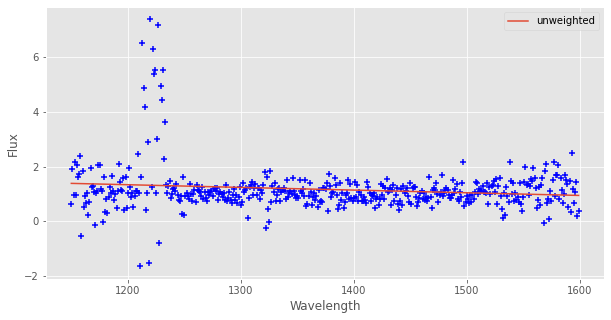

In [5]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

plt.scatter(X[..., 1], Y, c='b', marker='+')
plt.plot(X[..., 1], [theta.T @ x for x in X], label='unweighted');
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.legend();

#### ii.

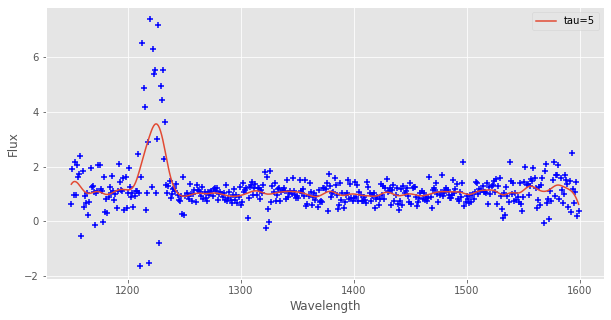

In [6]:
def theta(x, Y, tau):
    W = np.diag([math.exp(-(x - x_i[1])**2 / (2 * tau**2)) for x_i in X]) # weights
    return(np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ Y))

def hypothesis(Y, tau):
    return([theta(x[1], Y, tau).T @ x for x in X]);

tau = 5   
plt.scatter(X[..., 1], Y, c='b', marker='+')
plt.plot(X[..., 1], hypothesis(Y, tau), label = 'tau=' + str(tau));
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.legend();

#### iii.

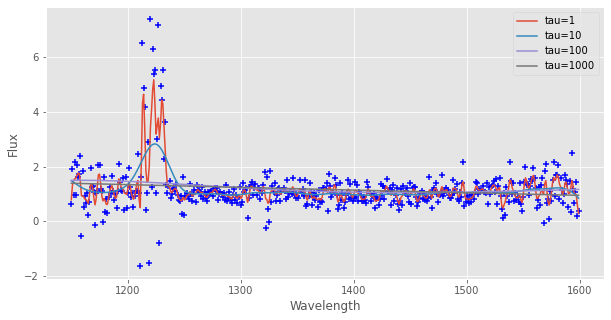

In [7]:
plt.scatter(X[..., 1], Y, c='b', marker='+')
for tau, color in zip([1, 10, 100, 1000], ['r', 'g', 'm', 'c']):
    plt.plot(X[..., 1], hypothesis(Y, tau), label = 'tau=' + str(tau));
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.legend();

As bandwidth (tau) decreases there is clearly overfitting problem, since red line (tau = 1) oscillates too much between 1200 and 1250. Prediction is not going be meaningful when small changes in X result in a large changes in Y. 

As tau gets larger (100 and 1000) the curve is flatter and follows the stright line of unweighted linear regression (underfitting). In this case, prediction is not good between 1200 and 1250.

### (c) Predicting quasar spectra with functional regression

#### i.

In [8]:
# Create new dataframes for smoothed values
ytrain = pd.DataFrame(index = qtrain.T.index)
for i in range(0, qtrain.shape[0]):
    ytrain[i] = hypothesis(qtrain.iloc[i].to_numpy(), 5)

ytest = pd.DataFrame(index = qtest.T.index)
for i in range(0, qtest.shape[0]):
    ytest[i] = hypothesis(qtest.iloc[i].to_numpy(), 5)

del qtrain
del qtest

#### ii.


In [33]:
def ly_right(f):
    return f[f.index >= 1300]

def ly_left(f):
    return f[f.index < 1200]

def d(f1, f2, lyman_right = True):
    dist = ly_right(f1 - f2) if lyman_right else (f1 - f2)
    return(dist.T @ dist)

In [34]:
def neighb(f, k = 3):
    closest = sorted([[i, d(f, ytrain[i])] 
                        for i in range(ytrain.columns.size)],
                        key = lambda x: x[1])
    return [x[0] for x in closest[1:k+1]]

def h(f):
    return sorted([[i, d(f, ytrain[i])] 
                        for i in range(ytrain.columns.size)],
                        key = lambda x: -x[1])[0][1]

In [49]:
def ker(t):
    return max((1-t), 0) 

def f_hat(f):
    nr = []
    for wl in range(ytrain.index.min(), 1200):
        nr.append(sum([ker(d(ytrain[i], f) / h(f)) * ytrain.loc[wl, i] 
                    for i in neighb(f)]))
    dr =  sum([ker(d(ytrain[i], f) / h(f)) for i in neighb(f)])
    return nr / dr

In [52]:
# Average training error:
sum([d(ly_left(ytrain[col]), f_hat(ytrain[col]), False)
     for col in ytrain]) / ytrain.columns.size

2.621920375437928

#### iii.

In [53]:
# Average test error:
sum([d(ly_left(ytest[col]), f_hat(ytest[col]), False)
     for col in ytest]) / ytest.columns.size


3.170286918624411

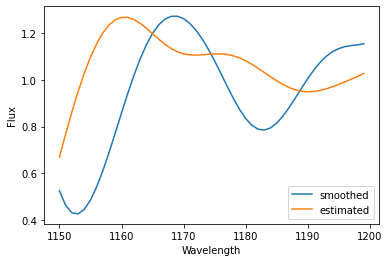

In [54]:
# Plot of test example 1
plt.plot(X[..., 1][:50], ly_left(ytest[1]), label = 'smoothed')
plt.plot(X[..., 1][:50], f_hat(ytest[1]), label = 'estimated');
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.legend();

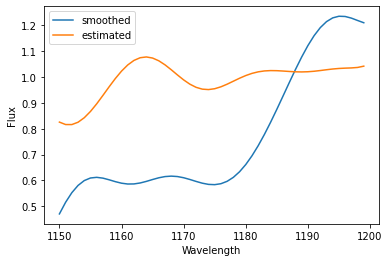

In [55]:
# Plot of test example 6
plt.plot(X[..., 1][:50], ly_left(ytest[6]), label = 'smoothed')
plt.plot(X[..., 1][:50], f_hat(ytest[6]), label = 'estimated');
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.legend();